<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA5_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  

Working with land satellite data:

 https://archive-beta.ics.uci.edu/ml/datasets/statlog+landsat+satellite.

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
# Imports for Voting, Bagging, Random Forest and AdaBoost classifiers
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [18]:
landsat_train = pd.read_csv("/content/drive/MyDrive/MLA/MLA5/landsat_train.csv")

In [19]:
landsat_test = pd.read_csv("/content/drive/MyDrive/MLA/MLA5/landsat_test.csv")

# Statistical and Visual Exploration

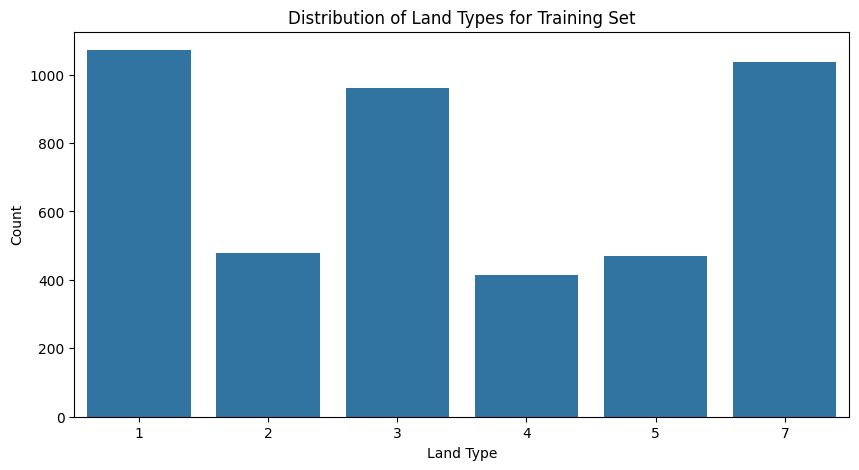

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x="land_type", y="count", data=pd.DataFrame(landsat_train["land_type"].value_counts()) )
plt.title("Distribution of Land Types for Training Set")
plt.ylabel("Count")
plt.xlabel("Land Type")
plt.show()

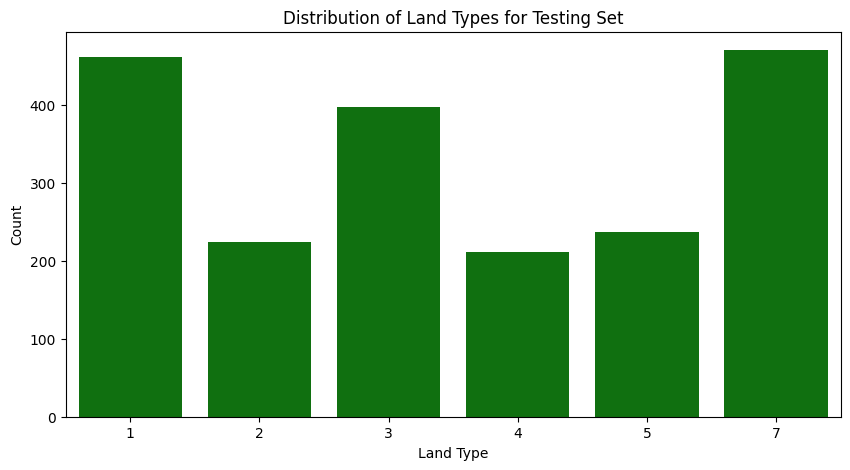

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x="land_type", y="count", data=pd.DataFrame(landsat_test["land_type"].value_counts()), color="green" )
plt.title("Distribution of Land Types for Testing Set")
plt.ylabel("Count")
plt.xlabel("Land Type")
plt.show()

In [57]:
landsat_train["land_type"].value_counts()

,count
land_type,
1,1072
7,1038
3,961
2,479
5,470
4,415


In [58]:
landsat_test["land_type"].value_counts()

,count
land_type,
7,470
1,461
3,397
5,237
2,224
4,211


# Statistical Analysis Results

Both the training and test data set have approximately the same distribution of land types. The test set has less overall data points which is as expected.

The order of most frequent land type is approximately as follows (greatest to least):
1. Land Type 1
2. Land Type 7
3. Land Type 3
4. Land Type 5 / Land Type 2
5. Land Type 4

There is no land type 6 in our data.


### Splitting Data into Train/Test

In [50]:
# Training Splits
x_train = landsat_train.drop("land_type", axis=1)
y_train = landsat_train["land_type"]

# Testing Splits
x_test = landsat_test.drop("land_type", axis=1)
y_test = landsat_test["land_type"]

### Building the Pipeline

In [51]:
numerical_cols = x_train.select_dtypes(include="number").columns
categorical_cols = x_train.select_dtypes(include="object").columns

numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])


In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", 'passthrough', categorical_cols)
    ]
)

### Executing the Model

In [53]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", RandomForestClassifier())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [54]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.913
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       461
           2       0.98      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.78      0.64      0.70       211
           5       0.93      0.89      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



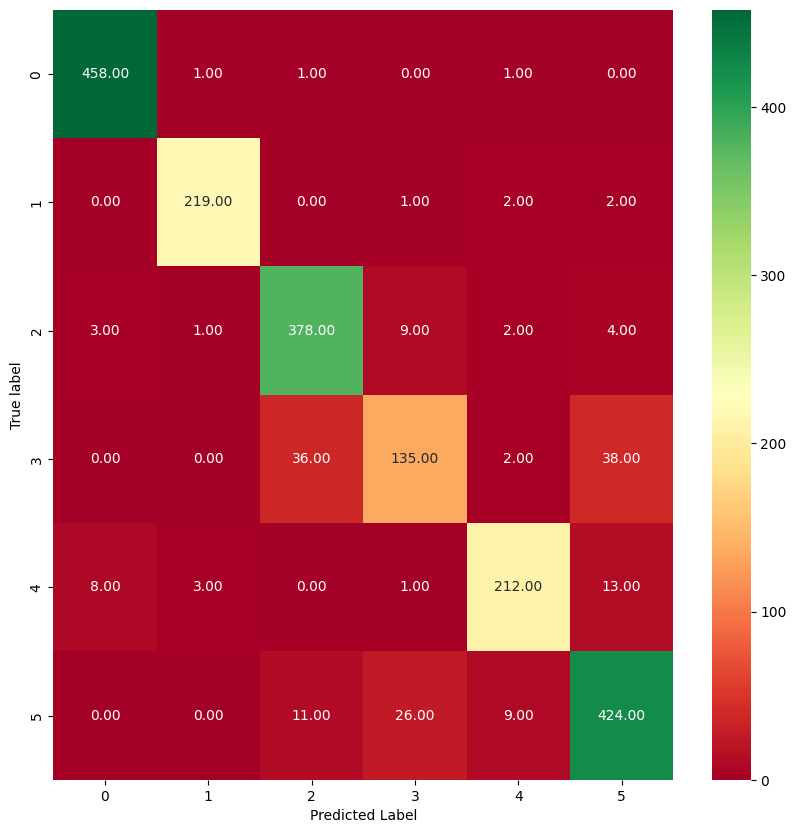

In [55]:
plot_cm(y_test, y_pred)

### Conclusion
Our Random Forest Classifier performed okay. Here are some obeservations from the confusion matrix:

The model does seem to confuse label 3 and 5 somewhat frequently.
Label 3 was incorrectly predicted as label 2 a significant number of times.

<br>

**Based on the classification report:**

Precision Score (Both Very High):
- Land Types 3 and 7 have lower precision scores compared to some of the others.
- Land Type 4 has a significantly lower precision score - 78%



This lower precisions is also visible in the results of the confusion matrix.

Recall Score:
- Land Type 4 has an extremely low recall of 64%

The low recall score means that our classification model only made correct predictions on test data 64% of the time for Land Type 4.


F1-Score:
- Land Type 4 has a low F1 score which, again, is indicated by the low precision and recalls.


The model performed well for certain Land Types but performed very poorly for Land Type 4.

# Problem 2

### Building the Pipeline

In [61]:
numerical_cols = x_train.select_dtypes(include="number").columns
categorical_cols = x_train.select_dtypes(include="object").columns

numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])


In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", 'passthrough', categorical_cols)
    ]
)

### Executing the Model

In [91]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ('classifier', VotingClassifier(estimators=[
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier()))
                           ], voting='hard'))
                           ])
problem2_model = pipeline.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Evaluating Model

In [94]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8665
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97       461
           2       0.97      0.96      0.97       224
           3       0.87      0.88      0.87       397
           4       0.56      0.59      0.57       211
           5       0.88      0.86      0.87       237
           7       0.86      0.84      0.85       470

    accuracy                           0.87      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.87      0.87      0.87      2000



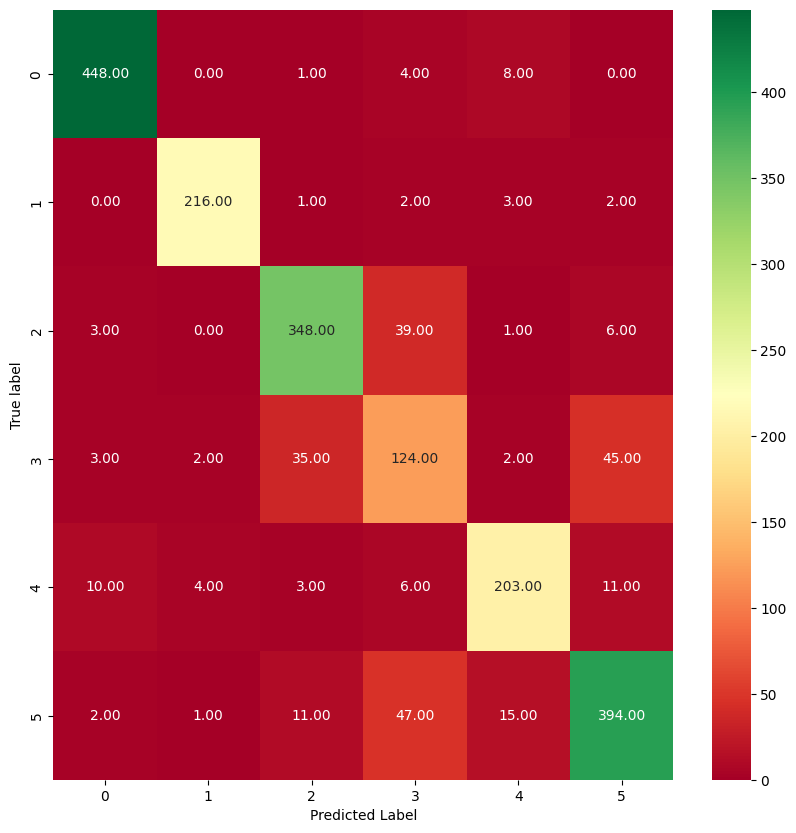

In [95]:
plot_cm(y_test, y_pred)

## Problem 3

### Reading the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA4/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
df.rename(columns={
    "Usage_kWh": "usage_kwh",
    "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh",
    "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh",
    "Lagging_Current_Power_Factor": "lag_current_pwr",
    "Leading_Current_Power_Factor": "lead_current_pwr",
    "NSM": "nsm",
    "WeekStatus": "week_status",
    "Day_of_week": "day_of_week",
    "Load_Type": "load_type"},
             inplace=True
             )

In [ ]:
df.sample(5)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
23270,31/08/2018 09:45,54.32,28.19,0.00,0.02,88.76,100.00,35100,Weekday,Friday,Medium_Load
11744,03/05/2018 08:15,90.14,58.46,0.00,0.04,83.90,100.00,29700,Weekday,Thursday,Light_Load
2449,26/01/2018 12:30,9.00,0.00,26.17,0.00,100.00,32.52,45000,Weekday,Friday,Medium_Load
3279,04/02/2018 04:00,5.80,5.65,0.00,0.00,71.63,100.00,14400,Weekend,Sunday,Light_Load
21061,08/08/2018 09:30,56.38,27.40,0.00,0.03,89.94,100.00,34200,Weekday,Wednesday,Medium_Load


### Splitting Data into Train/Test

In [ ]:
x = df.drop(["date", "usage_kwh"], axis=1)
y = df["usage_kwh"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [ ]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, drop="first"))
])

In [ ]:
numerical_cols = x.select_dtypes(include="number").columns
categorical_cols = x.select_dtypes(include="object").columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

### Executing the Model

In [ ]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regression", DecisionTreeRegressor())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regression', DecisionTreeRegressor())])

### Evaluating Model

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
print("Metrics on testing data split")
y_pred = pipeline.predict(x_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error (test): ", root_mean_squared_error(y_test, y_pred))

Metrics on testing data split
R2 Score:  0.9978970504825262
Root Mean Squared Error (test):  1.5461143850895451


In [ ]:
print("Metrics on training data split")
y_pred_train = pipeline.predict(x_train)

print("R2 Score: ", r2_score(y_train, y_pred_train))
print("Root Mean Squared Error (train): ", root_mean_squared_error(y_train, y_pred_train))

Metrics on training data split
R2 Score:  1.0
Root Mean Squared Error (train):  1.9967320328229718e-16


# Model Results

Root Mean Squared Error:
- RMSE was 1.54 on the test set
- RMSE was extremely low on the training set: 1.99E-16

The RMSE on the test set was low which indicates that the model was a good fit to the data.
The RMSE on the training set was essentially 0 which means the model was essentially a perfect fit to the training data. This makes sense considering this is the data the model was fit to.

R2 Score:
- The R2 Score on the test set was 0.997
- The R2 Score on the training set was 1.00

This indicates that the model performed very well overall on the test set.
The model perfomred perfectly on the training set, which makes sense considering it is the data the model is fit to.


# Conclusion

The model had an exceptional R2 score and low RMSE which means it was a great fit to our data. The regression is a good predictor or the Power Usage (usage_kwh).

This result makes sense as the Decision Tree is exception at clustering both numberical and categorical data and the regression allows us to predict a continuous value like Power Usage.